# __Proyecto Analisis y métodos númericos__

Universidad del Valle Sede Tuluá <br>
_Johan Steven Muñoz Lopez_ - 1958380


## Método _Newton - Raphson_
El siguiente algoritmo presenta el método de Newton-Raphson para encontrar la solución o raiz de una ecuacion de una variable de la forma $f(x) = 0$

La solucion se obtiene a partir de la serie $x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)}$ que, que idealmente a partir de un $x_0$ adecuado, converge a la raiz de la ecuación.

## Primera derivada
Derivada de primer orden, esta es necesaria para realizar el calculo de la solución de mediante la fórmula _Newton - Raphson_

In [39]:
import sympy as sp

def derivada(funcion): 
    y = funcion
    derivada = sp.diff(y,x)
    print('La derivada de la funcion es:', derivada)
    return sp.sympify(derivada)

x = sp.Symbol('x') ## Para que tome X como variable


## Método gráfico
Al graficar una función podemos identificar sus puntos de corte, es decir sus raices.

Esta es la forma más sencilla de hallar las raices de la función, aunque tambien la más inexacta.

In [40]:
def graficar(f, x_i, x_f, num = 100): 
    import matplotlib.pyplot as plt
    plt.style.use('dark_background')
    import numpy as np
    """
    f: función, previamente definida
    x_i: valor inferior del intervalo en x a graficar
    x_f: valor superior del intervalo en x a graficar
    num: división del intervalo
    return: gráfica de la función
    """
    x = np.linspace(x_i, x_f, num)
    fig, ax = plt.subplots(figsize=(15,5), ncols=1)
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()
    return None

### Algortimo Newton Raphson

In [41]:
def metodo_newton_raphson(f, df, p_0, errormaximo=10**-4, n=100):
    """
    f: Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0, previamente definida
    df: derivada de la función
    p_0: punto inicial
    error: error maximo permitido, criterio de parada
    n: número máximo de iteraciones, criterio de parada
    return: solución exacta o aproximada, si tiene.
    """
    print('iteracion #{:<2}: p_{:<2}={:.7f}'.format(0,0,p_0))
    error = 1
    i = 1
    while i <= n:
        
        if df(p_0) == 0:  # división al aplicar en la formula
            print('Solución no encontrara, es decir, df(x)=0')
            return None
        
        p_1 = p_0 - (f(p_0))/(df(p_0))  # fórmula método newthon Raphson
        error = abs(p_1-p_0)
        print('Iteracion #{:<2}: p_{:<2}={:.7f}, error={:.7f}'.format(i,i,p_1,error))
        
        if error < errormaximo: #criterio de parada
            print('Solución encontrada x={:.7f}, numero de iteraciones: {}'.format(p_1,i))
            return p_1
        
        p_0 = p_1
        i += 1
    print('Solución no encontrada: {}'.format(i-1))
    return None


### Ejemplo 1
Encontrar las soluciones de la ecuación $f(x) = 2x^3 + 6x^2 - 5x - 3$

In [42]:
# Definición de la función
def f(x):
    return 2 * x ** 3 + 6 * x ** 2 - 5 * x - 3

def df(x):
    return 6*x**2 + 12*x - 5


In [43]:
#Derivar

funcion = 2 * x ** 3 + 6 * x ** 2 - 5 * x - 3
derivada(funcion)

La derivada de la funcion es: 6*x**2 + 12*x - 5


6*x**2 + 12*x - 5

In [44]:
# Newton Raphson

metodo_newton_raphson(f, df, 0, 0.01)

iteracion #0 : p_0 =0.0000000
Iteracion #1 : p_1 =-0.6000000, error=0.6000000
Iteracion #2 : p_2 =-0.4278884, error=0.1721116
Iteracion #3 : p_3 =-0.4188923, error=0.0089962
Solución encontrada x=-0.4188923, numero de iteraciones: 3


-0.4188922900311658

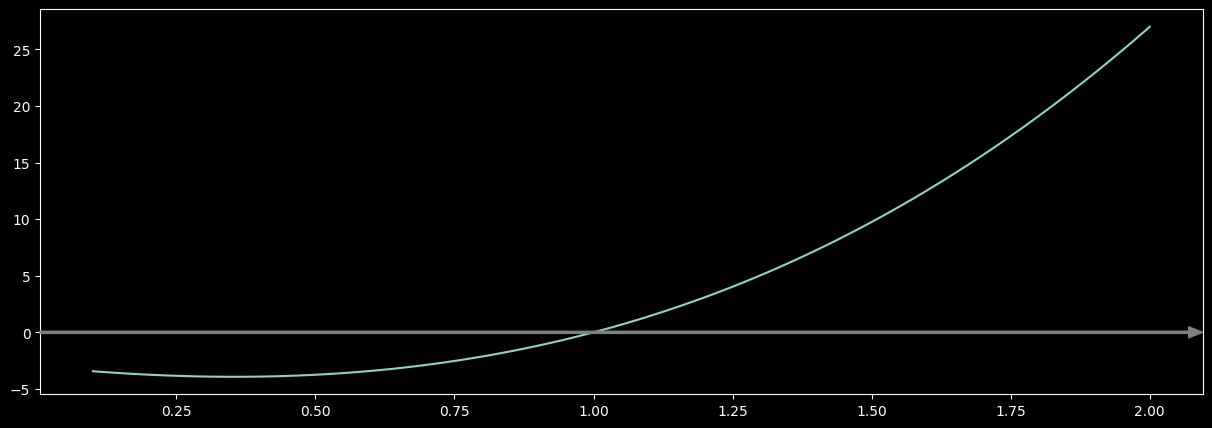

In [45]:
# Grafico

graficar(f,0.1,2)

### Ejemplo 2
Encontrar las soluciones de la ecuación $g(x) = x^3 - 4x^2 - 3x$

In [46]:
#Derivar

funcion = 4 * x ** 3 - 4 * x ** 2 - 3 * x
derivada(funcion)

La derivada de la funcion es: 12*x**2 - 8*x - 3


12*x**2 - 8*x - 3

In [47]:
# Definición de la función
def g(x):
    return 4 * x ** 3 - 4 * x ** 2 - 3 * x

def gf(x):
    return 12*x**2 - 8*x - 3

In [48]:
# Newton Raphson

metodo_newton_raphson(g, gf, 4, errormaximo=0.00001, n=500)

iteracion #0 : p_0 =4.0000000
Iteracion #1 : p_1 =2.8535032, error=1.1464968
Iteracion #2 : p_2 =2.1327646, error=0.7207386
Iteracion #3 : p_3 =1.7210845, error=0.4116801
Iteracion #4 : p_4 =1.5410476, error=0.1800369
Iteracion #5 : p_5 =1.5018332, error=0.0392144
Iteracion #6 : p_6 =1.5000039, error=0.0018293
Iteracion #7 : p_7 =1.5000000, error=0.0000039
Solución encontrada x=1.5000000, numero de iteraciones: 7


1.5000000000178173

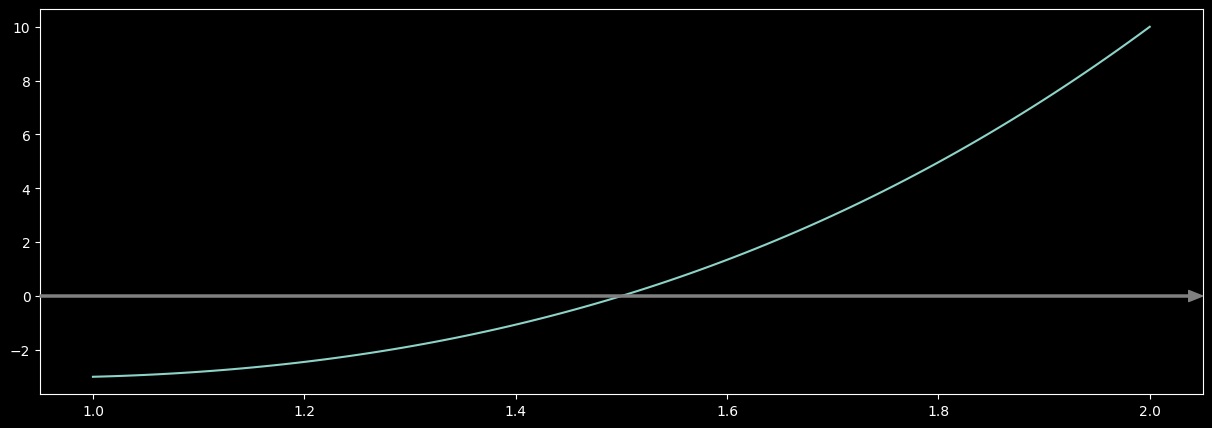

In [49]:
# Grafico

graficar(g,1,2)

### Ejemplo 3
Encontrar las soluciones de la ecuación $h(x) = x^3 + 2x - 5$

In [50]:
def h(x):
    return x ** 3 - 2 * x - 5

def hf(x):
    return 3*x**2 - 2

In [51]:
#Derivar

funcion =  x ** 3 - 2 * x - 5
derivada(funcion)

La derivada de la funcion es: 3*x**2 - 2


3*x**2 - 2

In [52]:
# Newton Raphson

metodo_newton_raphson(h, hf, 1, errormaximo=0.00000001, n=500)

iteracion #0 : p_0 =1.0000000
Iteracion #1 : p_1 =7.0000000, error=6.0000000
Iteracion #2 : p_2 =4.7655172, error=2.2344828
Iteracion #3 : p_3 =3.3487028, error=1.4168145
Iteracion #4 : p_4 =2.5315996, error=0.8171031
Iteracion #5 : p_5 =2.1739159, error=0.3576838
Iteracion #6 : p_6 =2.0978837, error=0.0760322
Iteracion #7 : p_7 =2.0945577, error=0.0033260
Iteracion #8 : p_8 =2.0945515, error=0.0000062
Iteracion #9 : p_9 =2.0945515, error=0.0000000
Solución encontrada x=2.0945515, numero de iteraciones: 9


2.0945514815423265

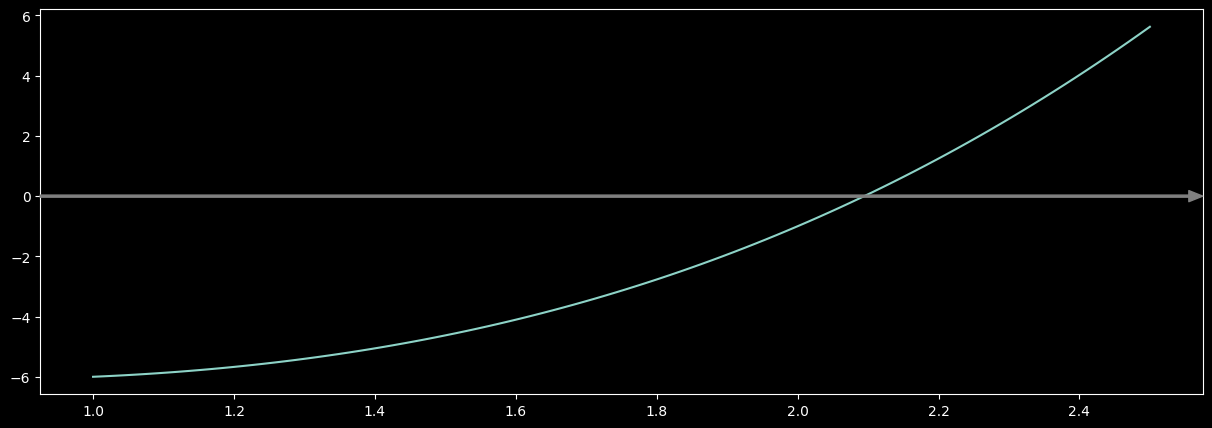

In [53]:
# Grafico

graficar(h,1,2.5)